<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/CIFAR_10_with_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Load Data
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_valid, y_valid) = cifar10.load_data()

In [ ]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

ReduceOnPlateau = keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=10,
)

root_logdir = os.path.join(os.curdir, "my_logs2")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

checkpoint_path = "best_weights1.h5"

model_checkpoint = ModelCheckpoint(checkpoint_path, 
                                    monitor='val_loss', 
                                    verbose=1, 
                                    save_best_only=True, 
                                    save_weights_only=True, 
                                    mode='min')

In [ ]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
 kernel_size=3, activation='relu', padding="SAME",kernel_initializer="he_normal",
 kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
         steps_per_epoch=len(x_train) // 32, epochs=50,validation_data=(x_valid, y_valid),
 callbacks=[tensorboard_cb,early_stopping_cb,ReduceOnPlateau, model_checkpoint])

Epoch 1/50
1562/1562 [==============================] - ETA: 0s - loss: 27.6467 - accuracy: 0.3643
Epoch 1: val_loss improved from inf to 20.19266, saving model to best_weights1.h5
1562/1562 [==============================] - 45s 28ms/step - loss: 27.6467 - accuracy: 0.3643 - val_loss: 20.1927 - val_accuracy: 0.4347 - lr: 0.0100
Epoch 2/50
1560/1562 [============================>.] - ETA: 0s - loss: 15.4106 - accuracy: 0.4797
Epoch 2: val_loss improved from 20.19266 to 11.52729, saving model to best_weights1.h5
1562/1562 [==============================] - 41s 26ms/step - loss: 15.4058 - accuracy: 0.4796 - val_loss: 11.5273 - val_accuracy: 0.4902 - lr: 0.0100
Epoch 3/50
1562/1562 [==============================] - ETA: 0s - loss: 8.9065 - accuracy: 0.5359
Epoch 3: val_loss improved from 11.52729 to 7.50897, saving model to best_weights1.h5
1562/1562 [==============================] - 41s 26ms/step - loss: 8.9065 - accuracy: 0.5359 - val_loss: 7.5090 - val_accuracy: 0.3914 - lr: 0.0100
E

In [ ]:
# Save Model
model.save('my_model.h5')

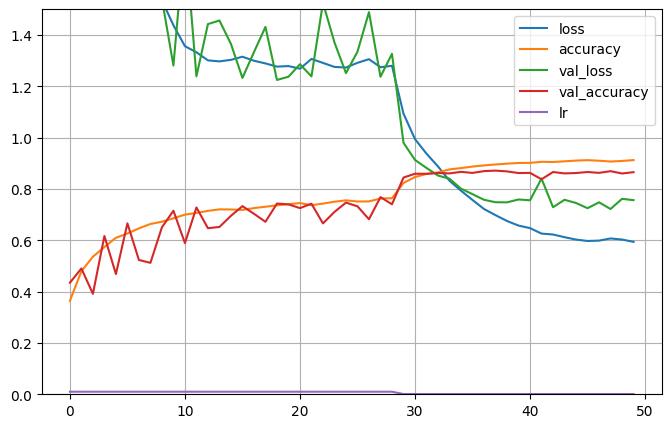

In [ ]:
# Plot metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()